In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
%matplotlib inline

# PROBLEM 1: Select features and categories for practice

In [2]:
data = load_iris()
print(data.target_names)
x = pd.DataFrame(data.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(data.target, columns = ['Species'])
df = pd.concat([x, y], axis=1)

['setosa' 'versicolor' 'virginica']


In [3]:
print(df.shape)
print(df)

(150, 5)
     sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [4]:
df[['sepal_length', 'petal_length']]

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [5]:
p1 = df[~(df['Species'] == 0)][['sepal_length', 'petal_length', 'Species']] 

In [6]:
p1.shape

(100, 3)

In [7]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   petal_length  100 non-null    float64
 2   Species       100 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 2.7 KB


In [8]:
p1.describe()

,sepal_length,petal_length,Species
count,100.000000,100.000000,100.000000
mean,6.262000,4.906000,1.500000
std,0.662834,0.825578,0.502519
min,4.900000,3.000000,1.000000
25%,5.800000,4.375000,1.000000
50%,6.300000,4.900000,1.500000
75%,6.700000,5.525000,2.000000
max,7.900000,6.900000,2.000000


In [9]:
p1.isnull().sum()

sepal_length    0
petal_length    0
Species         0
dtype: int64

# PROBLEM 2: Data analysis

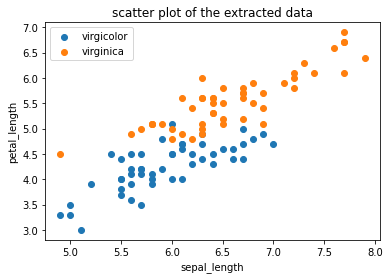

In [10]:
plt.scatter(df["sepal_length"][df["Species"] == 1], df["petal_length"][df["Species"] == 1], label = "virgicolor")
plt.scatter(df["sepal_length"][df["Species"] == 2], df["petal_length"][df["Species"] == 2], label = "virginica")
plt.title("scatter plot of the extracted data")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()
plt.show()

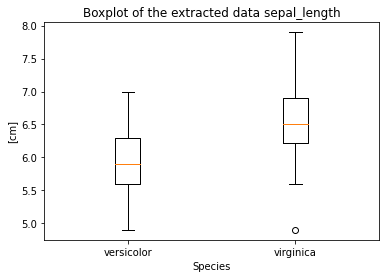

In [11]:
plt.boxplot([df[df['Species']==1]['sepal_length'],
                          df[df["Species"]==2]['sepal_length']])
plt.xticks([1,2] , data.target_names[1:])
plt.title("Boxplot of the extracted data {}".format('sepal_length'))
plt.xlabel("Species")
plt.ylabel("[cm]")
plt.show()

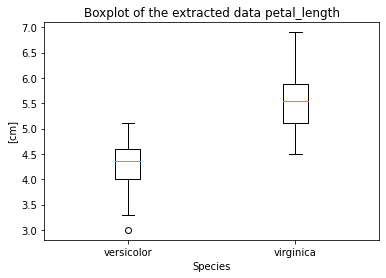

In [12]:
plt.boxplot([df[df['Species']==1]['petal_length'],
                          df[df["Species"]==2]['petal_length']])
plt.xticks([1,2] , data.target_names[1:])
plt.title("Boxplot of the extracted data {}".format('petal_length'))
plt.xlabel("Species")
plt.ylabel("[cm]")
plt.show()

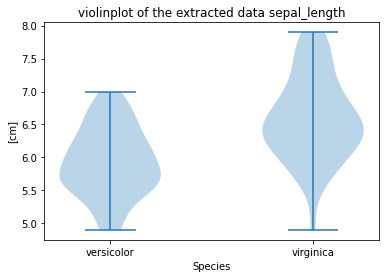

In [13]:
plt.violinplot([df[df["Species"]==1]['sepal_length'],
                             df[df["Species"]==2]['sepal_length']])
plt.xticks([1,2] , data.target_names[1:])
plt.title("violinplot of the extracted data {}".format('sepal_length'))
plt.xlabel("Species")
plt.ylabel("[cm]")
plt.show()

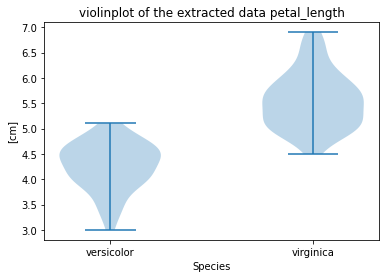

In [14]:
plt.violinplot([df[df["Species"]==1]['petal_length'],
                             df[df["Species"]==2]['petal_length']])
plt.xticks([1,2] , data.target_names[1:])
plt.title("violinplot of the extracted data {}".format('petal_length'))
plt.xlabel("Species")
plt.ylabel("[cm]")
plt.show()

# PROBLEM 3: Division of preprocessing/training data and verification data

In [15]:
x = p1.iloc[:, [0,1]]
y = p1.iloc[:, 2]

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25, random_state=42)

print("x train \n{}\n{}\n".format(x_train.shape,x_train))

print("y train \n{}\n{}\n".format(y_train.shape,y_train))

print("x test \n{}\n{}\n".format(x_test.shape,x_test))

print("y test \n{}\n{}\n".format(y_test.shape,y_test))

x train 
(75, 2)
     sepal_length  petal_length
65            6.7           4.4
90            5.5           4.4
146           6.3           5.0
59            5.2           3.9
122           7.7           6.7
..            ...           ...
110           6.5           5.1
121           5.6           4.9
64            5.6           3.6
142           5.8           5.1
101           5.8           5.1

[75 rows x 2 columns]

y train 
(75,)
65     1
90     1
146    2
59     1
122    2
      ..
110    2
121    2
64     1
142    2
101    2
Name: Species, Length: 75, dtype: int32

x test 
(25, 2)
     sepal_length  petal_length
133           6.3           5.1
103           6.3           5.6
120           6.9           5.7
95            5.7           4.2
94            5.6           4.2
89            5.5           4.0
72            6.3           4.9
130           7.4           6.1
60            5.0           3.5
50            7.0           4.7
68            6.2           4.5
80            5.5   

# PROBLEM 4: Pretreatment/Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

x_train_standard = StandardScaler().fit_transform(x_train)

x_test_standard = StandardScaler().fit_transform(x_test)

print("X train after StandardScaler Transform \n{}\n".format(x_train_standard))

print("X test after StandardScaler Transform \n{}\n".format(x_test_standard))

X train after StandardScaler Transform 
[[ 0.62124015 -0.65893772]
 [-1.15373171 -0.65893772]
 [ 0.02958286  0.05557306]
 [-1.59747467 -1.25436337]
 [ 2.10038336  2.08002027]
 [-0.56207442 -0.89710798]
 [-0.11833146 -0.77802285]
 [ 2.10038336  1.36550949]
 [-0.4141601  -0.53985259]
 [ 0.76915447  1.12733923]
 [-0.85790306 -0.53985259]
 [ 0.32541151  0.65099871]
 [ 0.17749719  0.41282845]
 [-0.4141601  -0.53985259]
 [-1.00581738 -0.53985259]
 [-0.85790306 -1.01619311]
 [-1.30164603 -0.53985259]
 [-2.04121763 -1.96887414]
 [ 0.62124015  0.29374332]
 [ 0.62124015  0.05557306]
 [-1.00581738 -1.25436337]
 [ 2.396212    1.72276488]
 [ 0.47332583 -0.65893772]
 [ 0.76915447  0.65099871]
 [-0.26624578 -0.30168233]
 [ 0.17749719 -0.77802285]
 [-1.15373171 -1.13527824]
 [-0.70998874 -1.01619311]
 [-1.00581738 -1.01619311]
 [ 0.47332583 -0.42076746]
 [ 0.17749719  0.77008384]
 [ 0.02958286 -0.30168233]
 [-0.70998874  0.17465819]
 [ 0.62124015 -0.30168233]
 [ 0.91706879  0.53191358]
 [-2.04121763 -

# PROBLEM 5: Learning and estimation

In [17]:
from sklearn.neighbors import KNeighborsClassifier

k_nn1 = KNeighborsClassifier(n_neighbors=1)
k_nn3 = KNeighborsClassifier(n_neighbors=3)
k_nn5 = KNeighborsClassifier(n_neighbors=5)
k_nn1.fit(x_train_standard, y_train)
k_nn3.fit(x_train_standard, y_train)
k_nn5.fit(x_train_standard, y_train)
yPredict_nn1 = k_nn1.predict(x_test_standard)
yPredict_nn3 = k_nn3.predict(x_test_standard)
yPredict_nn5 = k_nn5.predict(x_test_standard)

print("1-nn {}".format(yPredict_nn1))
print("3-nn {}".format(yPredict_nn3))
print("5-nn {}".format(yPredict_nn5))

1-nn [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1 2]
3-nn [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 1 1 2]
5-nn [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2]


# PROBLEM 6: Evaluation

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

predictions = [yPredict_nn1, yPredict_nn3, yPredict_nn5]
keys = ["1-nn","3-nn","5-nn"]

for i,prediction in enumerate(predictions,0):
    print("--------------------------------------------------------")
    print("predictions of {}".format(keys[i]))
    print("--------------------------------------------------------")
    print("accuracy =", accuracy_score(y_true=y_test, y_pred=prediction))
    print("precision =", precision_score(y_true=y_test, y_pred=prediction,average=None))    
    print("recall =", recall_score(y_true=y_test, y_pred=prediction,average=None))  
    print("f1 score =", f1_score(y_true=y_test, y_pred=prediction,average=None)) 
    print("confusion matrix =\n{}".format(confusion_matrix(y_true=y_test, y_pred=prediction))) 

--------------------------------------------------------
predictions of 1-nn
--------------------------------------------------------
accuracy = 0.92
precision = [1.         0.84615385]
recall = [0.85714286 1.        ]
f1 score = [0.92307692 0.91666667]
confusion matrix =
[[12  2]
 [ 0 11]]
--------------------------------------------------------
predictions of 3-nn
--------------------------------------------------------
accuracy = 0.88
precision = [0.92307692 0.83333333]
recall = [0.85714286 0.90909091]
f1 score = [0.88888889 0.86956522]
confusion matrix =
[[12  2]
 [ 1 10]]
--------------------------------------------------------
predictions of 5-nn
--------------------------------------------------------
accuracy = 0.84
precision = [0.91666667 0.76923077]
recall = [0.78571429 0.90909091]
f1 score = [0.84615385 0.83333333]
confusion matrix =
[[11  3]
 [ 1 10]]


Accuracy(correct answer rate): Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. 

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

F-measure: Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.

# PROBLEM 7: Visualization



In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

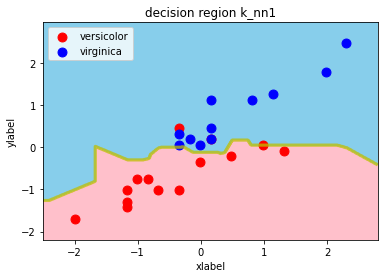

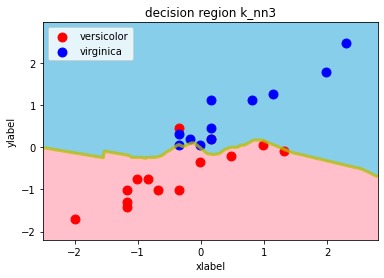

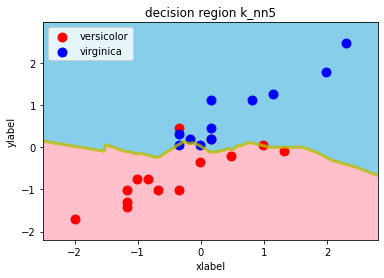

In [20]:
models = [k_nn1, k_nn3, k_nn5]
models_name = ['k_nn1', 'k_nn3', 'k_nn5']
for i,model in enumerate(models):
    decision_region(x_test_standard, y_test, model, title='decision region {}'.format(models_name[i]))

# PROBLEM 8: Learning by other methods

- Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(x_train_standard, y_train)

prediction_lr = lr.predict(x_test_standard)

print("predictions of LogisticRegression")
print("accuracy =", accuracy_score(y_true=y_test, y_pred=prediction_lr))
print("precision =", precision_score(y_true=y_test, y_pred=prediction_lr, average=None))    
print("recall =", recall_score(y_true=y_test, y_pred=prediction_lr, average=None))  
print("f1 score =", f1_score(y_true=y_test, y_pred=prediction_lr, average=None)) 
print("confusion matrix =\n{}".format(confusion_matrix(y_true=y_test, y_pred=prediction_lr))) 

predictions of LogisticRegression
accuracy = 0.92
precision = [1.         0.84615385]
recall = [0.85714286 1.        ]
f1 score = [0.92307692 0.91666667]
confusion matrix =
[[12  2]
 [ 0 11]]


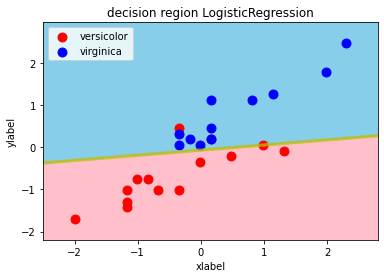

In [22]:
decision_region(x_test_standard, y_test, lr, title='decision region LogisticRegression')

- SVM


In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

svm = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(x_train_standard, y_train)

prediction_svc = svm.predict(x_test_standard)

print("predictions of SVC")
print("accuracy =", accuracy_score(y_true=y_test, y_pred=prediction_svc))
print("precision =", precision_score(y_true=y_test, y_pred=prediction_svc, average=None))    
print("recall =", recall_score(y_true=y_test, y_pred=prediction_svc, average=None))  
print("f1 score =", f1_score(y_true=y_test, y_pred=prediction_svc, average=None)) 
print("confusion matrix =\n{}".format(confusion_matrix(y_true=y_test, y_pred=prediction_svc))) 

predictions of SVC
accuracy = 0.88
precision = [1.         0.78571429]
recall = [0.78571429 1.        ]
f1 score = [0.88 0.88]
confusion matrix =
[[11  3]
 [ 0 11]]


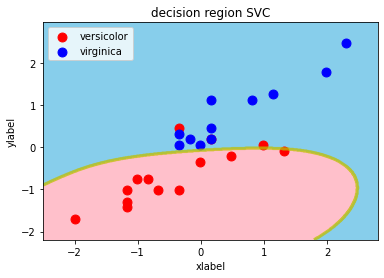

In [24]:
decision_region(x_test_standard, y_test, svm, title='decision region SVC')

- Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0).fit(x_train_standard, y_train)

prediction_dtc = dtc.predict(x_test_standard)

print("predictions of Decision tree")
print("accuracy =", accuracy_score(y_true=y_test, y_pred=prediction_dtc))
print("precision =", precision_score(y_true=y_test, y_pred=prediction_dtc, average=None))    
print("recall =", recall_score(y_true=y_test, y_pred=prediction_dtc, average=None))  
print("f1 score =", f1_score(y_true=y_test, y_pred=prediction_dtc, average=None)) 
print("confusion matrix =\n{}".format(confusion_matrix(y_true=y_test, y_pred=prediction_dtc))) 

predictions of Decision tree
accuracy = 0.92
precision = [1.         0.84615385]
recall = [0.85714286 1.        ]
f1 score = [0.92307692 0.91666667]
confusion matrix =
[[12  2]
 [ 0 11]]


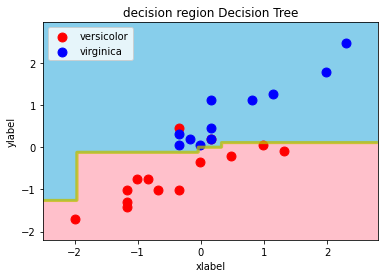

In [26]:
decision_region(x_test_standard, y_test, dtc, title='decision region Decision Tree')

- Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(x_train_standard, y_train)

prediction_rfc = rfc.predict(x_test_standard)

print("predictions of Random forest")
print("accuracy =", accuracy_score(y_true=y_test, y_pred=prediction_rfc))
print("precision =", precision_score(y_true=y_test, y_pred=prediction_rfc ,average=None))    
print("recall =", recall_score(y_true=y_test, y_pred=prediction_rfc,average=None))  
print("f1 score =", f1_score(y_true=y_test, y_pred=prediction_rfc ,average=None)) 
print("confusion matrix =\n{}".format(confusion_matrix(y_true=y_test, y_pred=prediction_rfc))) 

predictions of Random forest
accuracy = 0.92
precision = [1.         0.84615385]
recall = [0.85714286 1.        ]
f1 score = [0.92307692 0.91666667]
confusion matrix =
[[12  2]
 [ 0 11]]


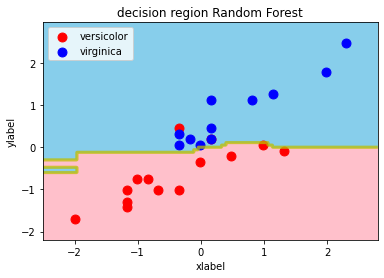

In [28]:
decision_region(x_test_standard, y_test, rfc, title='decision region Random Forest')

In [31]:
list_accuracy = [accuracy_score(y_test , yPredict_nn5) ,accuracy_score(y_test , prediction_lr) , accuracy_score(y_test , prediction_svc) , accuracy_score(y_test , prediction_dtc) ,accuracy_score(y_test , prediction_rfc)]

list_precision = [precision_score(y_test, yPredict_nn5), precision_score(y_test, prediction_lr), precision_score(y_test, prediction_svc), precision_score(y_test,  prediction_dtc), precision_score(y_test, prediction_rfc)]

list_recall = [recall_score(y_test, yPredict_nn5), recall_score(y_test, prediction_lr), recall_score(y_test, prediction_svc), recall_score(y_test, prediction_dtc), recall_score(y_test, prediction_rfc)]

list_f1 = [f1_score(y_test, yPredict_nn5), f1_score(y_test, prediction_lr), f1_score(y_test, prediction_svc), f1_score(y_test, prediction_dtc), f1_score(y_test, prediction_rfc)]

df_accuracy = pd.DataFrame(list_accuracy)
df_precision = pd.DataFrame(list_precision)
df_recall = pd.DataFrame(list_recall)
df_f1 = pd.DataFrame(list_f1)

df_table = pd.concat([df_accuracy, df_precision, df_recall, df_f1] , axis = 1) 
df_table.columns = ["Accuracy", "Precision", "Recall", "F-measure"]
df_table.index = ["Nearest neighbor method 5", "Logistic regression", "SVM", "Decision tree", "Random forest"]


In [30]:
df_table

,Accuracy,Precision,Recall,F-measure
Nearest neighbor method 5,0.84,0.916667,0.785714,0.846154
Logistic regression,0.92,1.000000,0.857143,0.923077
SVM,0.88,1.000000,0.785714,0.880000
Decision tree,0.92,1.000000,0.857143,0.923077
Random forest,0.92,1.000000,0.857143,0.923077


As we can see, 3 methods Logistic regression, Decision tree, and Random forest have highest values which makes these methods seem to be suitable with our dataset and our goals because these methods give the predict results that can fit actual values with highest percentage. 